In [1]:
#!/usr/bin/env python3
"""
Dynamic Plot results in time domain, and the frequency spectrum.
Results contain:
    Remover -- the output of DNF 
    Output -- the output of the system (as feedback)(filtered channle 1 data minus Remover)
    filtered channel 1 data
    filtered channel 2 data
    raw channel 1 data
    raw channel 2 data 
"""
# -*- coding: utf-8 -*-
import sys
import time
import pylab as plt
import matplotlib.animation as animation
import numpy as np

# Plot the output of the Adaptive Filter with A Deep Neuronal Network


----
## Parameters
You can change the subject number and Select data recorded form "arm" or "wrist" here 

In [2]:
# Parameters
# Define subject number(1, 2 or relax), trails(arm, wrist)
sbjct_num = "1" # "1", "2" or "relax"
trail = "wrist" # "arm" or "wrist"

fs = 250
plotMaxLength = 1000

In [3]:
def Read_data():
    # Load data
    raw_data = np.loadtxt("../Data/RawData/" + ("" if (sbjct_num == "relax") else "data_") + ("relax" if (sbjct_num == "relax") else trail) + "_" + (trail if (sbjct_num == "relax") else sbjct_num) + ".tsv")[:,[0,7,8]]
    results_data = np.loadtxt(("../Data/Output/output_" + ("relax" if (sbjct_num == "relax") else trail) + "_" + (trail if (sbjct_num == "relax") else sbjct_num) + ".tsv"))
    output = results_data[:,1]
    remover = results_data[:,2]
    filtered_data = results_data[:,[3,4]]
    return raw_data,filtered_data, remover, output

def InitializeGUI():
    # Plot
    # Initialize Figure
    figure = plt.figure(
        "Subject " + "  " + ("relax" if (sbjct_num == "relax") else sbjct_num) + "  " + trail + " Results")
    # Adjust Figure Layout
    plt.subplots_adjust(left=0.05, bottom=0.05,right=0.95,top=0.95,wspace=0.3, hspace=0.6)
    # Subplots
    ax1 = figure.add_subplot(3, 2, 1)
    plt.title("Chanel 1 raw data")
    plt.grid(True)
    ax2 = figure.add_subplot(3, 2, 2)
    plt.title("Chanel 2 raw data")
    plt.grid(True)
    ax3 = figure.add_subplot(3, 2, 3)
    plt.title("Chanel 1 filtered data")
    plt.grid(True)
    ax4 = figure.add_subplot(3, 2, 4)
    plt.title("Chanel 2 filtered data")
    plt.grid(True)
    ax5 = figure.add_subplot(3, 2, 5)
    plt.title("Remover")
    plt.grid(True)
    ax6 = figure.add_subplot(3, 2, 6)
    plt.title("Output")
    plt.grid(True)
    ax = [ax1,ax2,ax3,ax4,ax5,ax6]
    return figure, ax

def Plot_frecqSpectrum(ax, raw_data, filtered_data, remover, output):
    # Plot
    # plot frequency spectrum
    y_1 = np.real(np.fft.fft(raw_data[:,1]))[0:int(len(raw_data[:,1])/2)]
    ax[0].set_ylim(0, max(y_1))
    line1, = ax[0].plot(np.linspace(0, fs/2, int(len(raw_data[:,1])/2)),y_1)
    y_2 = np.real(np.fft.fft(raw_data[:, 2]))[0:int(len(raw_data[:, 2])/2)]
    ax[1].set_ylim(0, max(y_2))
    line2, = ax[1].plot(np.linspace(0, fs/2, int(len(raw_data[:, 2])/2)), y_2)
    y_3 = np.real(np.fft.fft(filtered_data[:, 0]))[0:int(len(filtered_data[:, 0])/2)]
    ax[2].set_ylim(0, max(y_3))
    line3, = ax[2].plot(np.linspace(0, fs/2, int(len(filtered_data[:, 0])/2)), y_3)
    y_4 = np.real(np.fft.fft(filtered_data[:, 1]))[0:int(len(filtered_data[:, 1])/2)]
    ax[3].set_ylim(0, max(y_4))
    line4, = ax[3].plot(np.linspace(0, fs/2, int(len(filtered_data[:, 1])/2)), y_4)
    y_5 = np.real(np.fft.fft(remover[300:]))[0:int(len(remover[300:])/2)]
    ax[4].set_ylim(0, max(y_5))
    line5, = ax[4].plot(np.linspace(0, fs/2, int(len(remover[300:])/2)), y_5)
    y_6 = np.real(np.fft.fft(output[300:]))[0:int(len(output[300:])/2)]
    ax[5].set_ylim(0, max(y_6))
    line6, = ax[5].plot(np.linspace(0, fs/2, int(len(output[300:])/2)), y_6)

def Dynamic_plot(fig, ax, raw_data, filtered_data, remover, output):
    # X axes of time domain
    t_x = np.linspace(0,plotMaxLength-1,plotMaxLength)
    # define the end of the animation
    end = min(len(output), len(remover), len(filtered_data[:, 0]), len(filtered_data[:, 1]),
                len(raw_data[:, 1]), len(raw_data[:, 2]))
    # plot time domain animation
    line1, = ax[0].plot(t_x, raw_data[0:plotMaxLength,1])
    line2, = ax[1].plot(t_x,raw_data[0:plotMaxLength,2])
    line3, = ax[2].plot(t_x, filtered_data[0:plotMaxLength,0])
    ax[2].set_ylim(min(filtered_data[300:, 0]), max(filtered_data[300:, 0]))
    line4, = ax[3].plot(t_x, filtered_data[0:plotMaxLength,1])
    ax[3].set_ylim(min(filtered_data[300:,1]),max(filtered_data[300:,1]))
    line5, = ax[4].plot(t_x, remover[0:plotMaxLength])
    ax[4].set_ylim(min(remover[250:]), max(remover[250:]))
    line6, = ax[5].plot(t_x, output[0:plotMaxLength])
    ax[5].set_ylim(min(output[250:]), max(output[250:]))
    # Define animation function
    def animate(i):
        # update the data
        line1.set_data(t_x, raw_data[0 + i:plotMaxLength + i, 1])
        ax[0].set_ylim(min(raw_data[0 + i:plotMaxLength + i, 1]),max(raw_data[0 + i:plotMaxLength + i, 1]))
        line2.set_data(t_x, raw_data[0 + i:plotMaxLength + i, 2])
        ax[1].set_ylim(min(raw_data[0 + i:plotMaxLength + i, 2]),max(raw_data[0 + i:plotMaxLength + i, 2]))
        line3.set_data(t_x, filtered_data[0 + i:plotMaxLength + i, 0])
        line4.set_data(t_x, filtered_data[0 + i:plotMaxLength + i, 1])
        line5.set_data(t_x, remover[0 + i:plotMaxLength + i])
        ax[4].set_ylim(min(remover[0 + i:plotMaxLength + i]),max(remover[0 + i:plotMaxLength + i]))
        line6.set_data(t_x, output[0 + i:plotMaxLength + i])
        ax[5].set_ylim(min(output[0 + i:plotMaxLength + i]),max(output[0 + i:plotMaxLength + i]))
        return line1, line2, line3, line4, line5, line6,
    return animate

----
## Frequency Spectrum
Plot the frequency Spectrum of Channel 1 and channel 2 raw data, channel 1 and channel 2 pre-filtered data, Remover (The output of DNF) and the Output of the System which is cleaned ECG
- Channel 1  -- Signal (ECG + EMG)
- Channel 2  -- noise (EMG)
- Raw data -- Recorded by attys-scope 
- filtered data -- DC and 50 Hz removed

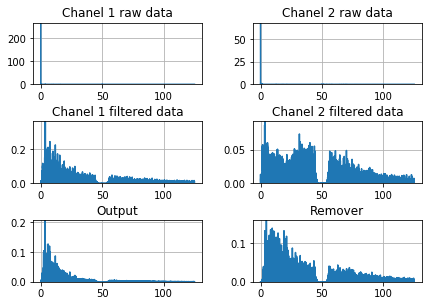

In [4]:
# plot frequency Spectrum
# read data
raw_data,filtered_data, remover, output = Read_data()
# initialize GUI
figure, ax = InitializeGUI()
# plot frequency Spectrum
Plot_frecqSpectrum(ax, raw_data, filtered_data, remover, output)
plt.show()

----
## Dynamic Plot Data
Dynamic Plot raw data (channel 1 and channel 2), pre-filtered data (channel 1 and channel 2), Remover (The output of DNF) and the Output of the System which is cleaned ECG.

<IPython.core.display.Javascript object>


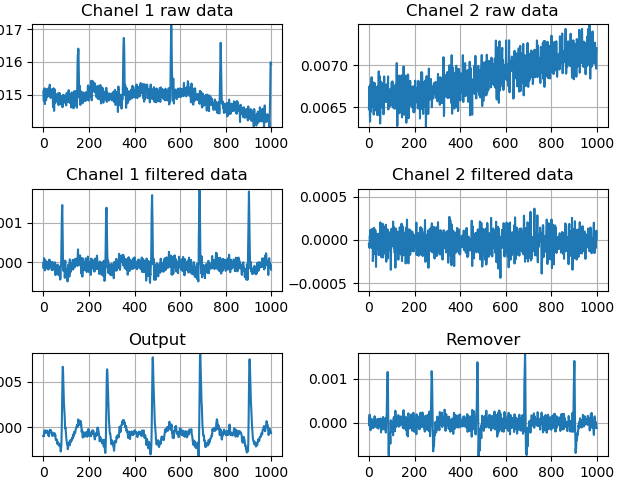

In [5]:
%matplotlib notebook
# plot remover, output, raw data and filtered data
# re-initialize GUI
figure1, ax1 = InitializeGUI()
# get animation function
animate_function = Dynamic_plot(figure1, ax1, raw_data, filtered_data, remover, output)
# Start animation
ani = animation.FuncAnimation(
    figure1, animate_function, interval=3, save_count=500)
plt.show()

## Plot the results of LMS filter

<IPython.core.display.Javascript object>


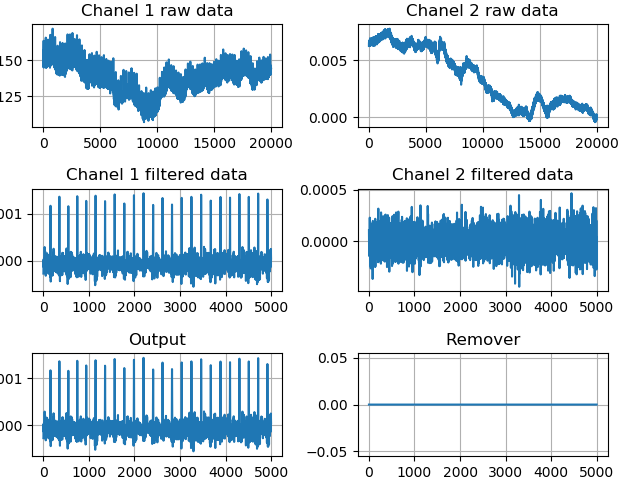

In [9]:
# re-initialize GUI
figure2, ax2 = InitializeGUI()
# read data
lms_results = np.loadtxt(("../Data/LMS_Output/output_" + ("relax" if (sbjct_num == "relax") else trail) + "_" + (trail if (sbjct_num == "relax") else sbjct_num) + ".tsv"))
lms_output = lms_results[:,1]
lms_remover = lms_results[:,2]
lms_prefiltered = lms_results[:,[3,4]]

ax2[0].plot(raw_data[:,1])
ax2[1].plot(raw_data[:,2])
ax2[2].plot(lms_prefiltered[10000:15000,0])
ax2[3].plot(lms_prefiltered[10000:15000,1])
ax2[4].plot(lms_output[10000:15000])
ax2[5].plot(lms_remover[10000:15000])

plt.show()
